In [1]:
import numpy as np
import pandas as ps
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print('Num GPUs Available: ', len(physical_devices))
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print('No GPUs Available.')

No GPUs Available.


Preparing data

In [44]:
root_images_folder='D:\plant image classification\images'
root_directories=os.listdir(root_images_folder)
required_directories=[]



train_path= 'D:/plant image classification/plant-classsification/train'
test_path='D:/plant image classification/plant-classsification/test'



for i in root_directories :
    b=os.listdir(f'{root_images_folder}\{i}')
    if len(b)>=50:
        shutil.move(f'{root_images_folder}\{i}',train_path)


In [18]:
train_path= 'D:/plant image classification/plant-classsification/train'
test_path='D:/plant image classification/plant-classsification/test'

for i in os.listdir(train_path):
    source=f'{train_path}/{i}'
    destination=f'{test_path}/{i}'
    
    if not os.path.exists(destination):
        os.makedirs(destination)
    train_path_images=os.listdir(source)
    rand_images=random.sample(train_path_images,k=int(len(train_path_images)*0.2))
    
    for j in rand_images:
        shutil.move(f'{source}/{j}',f'{destination}/{j}')   

In [2]:
train_path= 'D:/plant image classification/plant-classsification/train'
test_path='D:/plant image classification/plant-classsification/test'

classes_plant = os.listdir(train_path)

In [3]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=classes_plant,batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=classes_plant,batch_size=10)

Found 9532 images belonging to 131 classes.
Found 9532 images belonging to 131 classes.


In [4]:
imgs,labels=next(train_batches)

In [5]:
def plotImages(images_arr):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

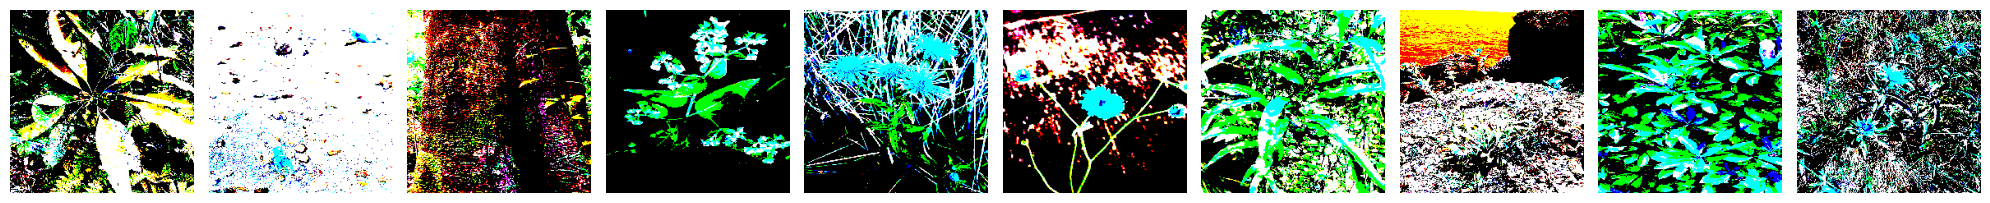

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
plotImages(imgs)
print(labels)

Training model

In [15]:
resnet_model=Sequential()

pretrained_model=tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling='avg',
    classes=len(classes_plant),
)

for layer in pretrained_model.layers:
    layer.trainable=False
    
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(len(classes_plant),activation='softmax'))

In [16]:
resnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 131)               67203     
                                                                 
Total params: 24704003 (94.24 MB)
Trainable params: 1116291 (4.26 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [17]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
epochs=10
history=resnet_model.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=epochs
)

Epoch 1/10
954/954 [==============================] - 4315s 5s/step - loss: 3.0129 - accuracy: 0.3049 - val_loss: 1.6838 - val_accuracy: 0.5551
Epoch 2/10
954/954 [==============================] - 4262s 4s/step - loss: 1.6953 - accuracy: 0.5426 - val_loss: 1.1225 - val_accuracy: 0.6989
Epoch 3/10
954/954 [==============================] - 4291s 5s/step - loss: 1.1718 - accuracy: 0.6627 - val_loss: 0.7801 - val_accuracy: 0.7718
Epoch 4/10
954/954 [==============================] - 4355s 5s/step - loss: 0.8187 - accuracy: 0.7550 - val_loss: 0.5422 - val_accuracy: 0.8384
Epoch 5/10
954/954 [==============================] - 4228s 4s/step - loss: 0.5906 - accuracy: 0.8201 - val_loss: 0.3695 - val_accuracy: 0.8967
Epoch 6/10
954/954 [==============================] - 4818s 5s/step - loss: 0.4014 - accuracy: 0.8779 - val_loss: 0.2463 - val_accuracy: 0.9316
Epoch 7/10
954/954 [==============================] - 5059s 5s/step - loss: 0.3012 - accuracy: 0.9073 - val_loss: 0.2236 - val_accuracy:

In [19]:
resnet_model.save('plant_classification.h5')
print("Model Saved")

d:\plant image classification\.venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model Saved
